In [64]:
import pandas as pd
df=pd.read_csv("covid.csv")
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [66]:
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [67]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

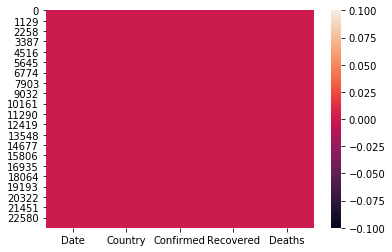

In [68]:
import seaborn as sns
sns.heatmap(df.isnull())

In [69]:
df.Deaths.value_counts()

0        12989
1         1244
2          655
3          550
4          324
         ...  
473          1
4603         1
521          1
2600         1
30689        1
Name: Deaths, Length: 1768, dtype: int64

In [70]:
len(df['Country'].unique())

189

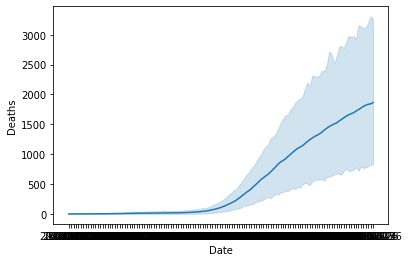

In [71]:
sns.lineplot(x=df['Date'],y=df['Deaths'],data=df)

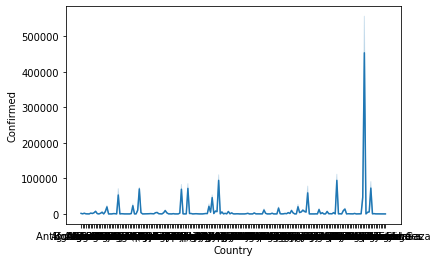

In [72]:
sns.lineplot(x=df['Country'],y=df['Confirmed'],data=df)

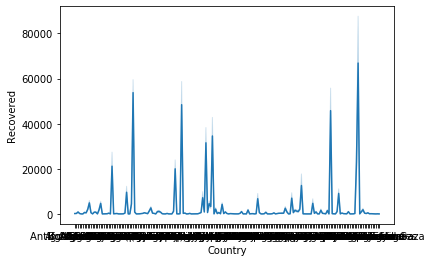

In [73]:
sns.lineplot(x=df['Country'],y=df['Recovered'],data=df)

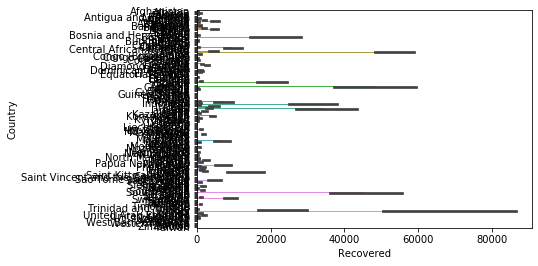

In [74]:
sns.barplot(x='Recovered',y='Country',data=df)

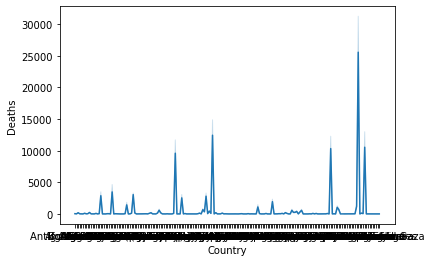

In [75]:
sns.lineplot(x=df['Country'],y=df['Deaths'],data=df)

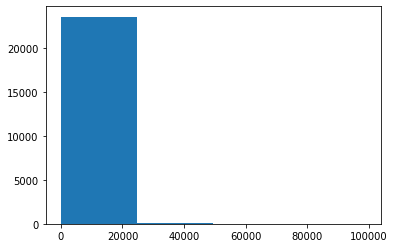

In [76]:
import matplotlib.pyplot as plt
plt.hist(x="Deaths",bins=4,data=df)
plt.show()

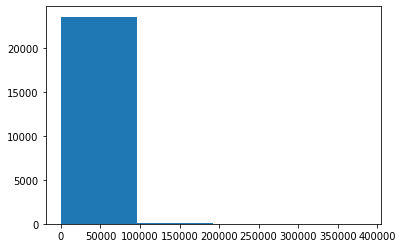

In [77]:
import matplotlib.pyplot as plt
plt.hist(x="Recovered",bins=4,data=df)
plt.show()

In [78]:
df.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [79]:
from sklearn.preprocessing import LabelEncoder       # converting string data to numerical
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'].astype(str))
df
    

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,184,429,365,3
23684,2020-05-26,185,9,6,1
23685,2020-05-26,186,249,10,49
23686,2020-05-26,187,920,336,7


In [80]:
df.dtypes

Date         object
Country       int32
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

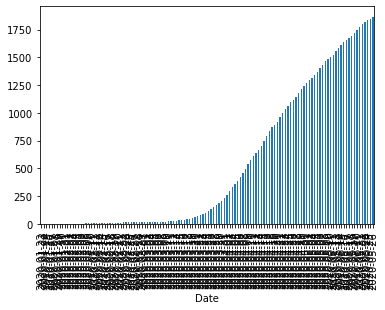

In [81]:
df.groupby('Date')['Deaths'].mean().plot.bar()

In [82]:
df.skew()

Country       0.009016
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [83]:
df['Date']=pd.to_datetime(df['Date'])

In [84]:
df_dates=pd.DataFrame()
df_dates["month"]=df["Date"].dt.month_name()
df_dates["year"]=df["Date"].dt.year
df_dates["day"]=df['Date'].dt.day_name()
df_dates

,month,year,day
0,January,2020,Wednesday
1,January,2020,Wednesday
2,January,2020,Wednesday
3,January,2020,Wednesday
4,January,2020,Wednesday
...,...,...,...
23683,May,2020,Tuesday
23684,May,2020,Tuesday
23685,May,2020,Tuesday
23686,May,2020,Tuesday


In [85]:
df_dates["year"].drop_duplicates()

0    2020
Name: year, dtype: int64

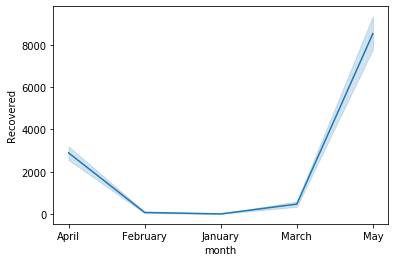

In [86]:
sns.lineplot(x=df_dates['month'],y=df['Recovered'],data=df)

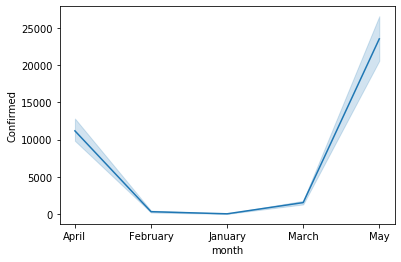

In [87]:
sns.lineplot(x=df_dates['month'],y=df['Confirmed'],data=df)

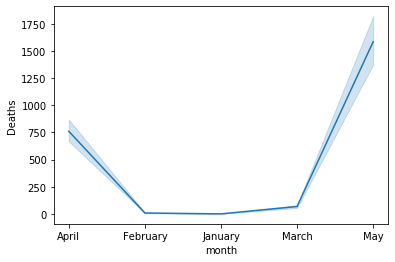

In [88]:
sns.lineplot(x=df_dates['month'],y=df['Deaths'],data=df)

In [89]:
df['Date']=df_dates['month']

In [90]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,January,0,0,0,0
1,January,1,0,0,0
2,January,2,0,0,0
3,January,3,0,0,0
4,January,4,0,0,0
...,...,...,...,...,...
23683,May,184,429,365,3
23684,May,185,9,6,1
23685,May,186,249,10,49
23686,May,187,920,336,7


In [91]:
le=LabelEncoder()
df['Date']=le.fit_transform(df['Date'].astype(str))
df

,Date,Country,Confirmed,Recovered,Deaths
0,2,0,0,0,0
1,2,1,0,0,0
2,2,2,0,0,0
3,2,3,0,0,0
4,2,4,0,0,0
...,...,...,...,...,...
23683,4,184,429,365,3
23684,4,185,9,6,1
23685,4,186,249,10,49
23686,4,187,920,336,7


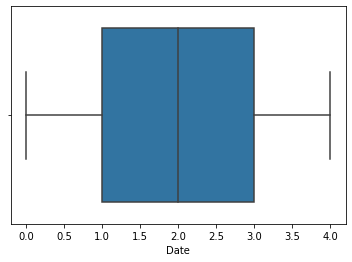

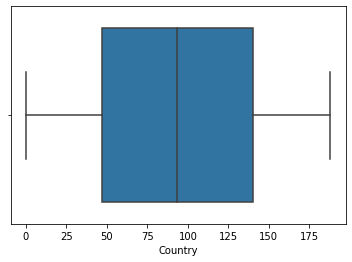

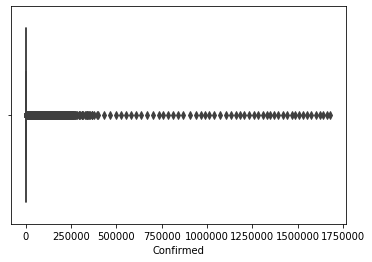

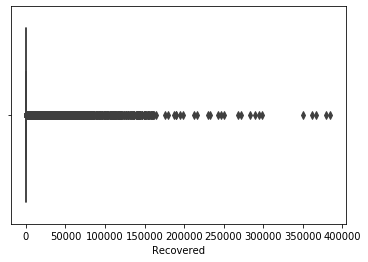

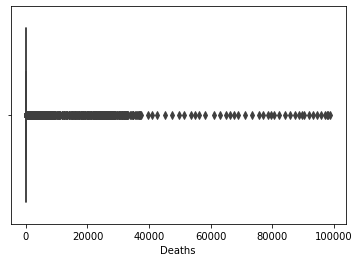

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

In [93]:
from scipy.stats import zscore
import numpy as np

In [94]:
z=np.abs(zscore(df))
z

array([[0.03173404, 1.7192047 , 0.13641539, 0.17049719, 0.13197356],
       [0.03173404, 1.7008415 , 0.13641539, 0.17049719, 0.13197356],
       [0.03173404, 1.68247831, 0.13641539, 0.17049719, 0.13197356],
       ...,
       [1.36456375, 1.69634993, 0.13215314, 0.16983681, 0.11970126],
       [1.36456375, 1.71471313, 0.12066732, 0.1483084 , 0.13022038],
       [1.36456375, 1.73307632, 0.13545681, 0.16884624, 0.13097174]])

In [95]:
threshold=3               #Identifying outlirs
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [96]:
df1=df[(z<3).all(axis=1)]   #Removing outliers
df1

,Date,Country,Confirmed,Recovered,Deaths
0,2,0,0,0,0
1,2,1,0,0,0
2,2,2,0,0,0
3,2,3,0,0,0
4,2,4,0,0,0
...,...,...,...,...,...
23683,4,184,429,365,3
23684,4,185,9,6,1
23685,4,186,249,10,49
23686,4,187,920,336,7


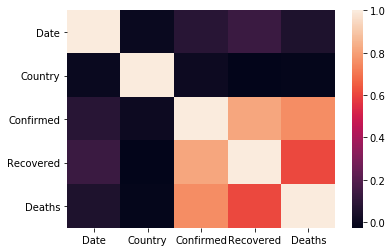

In [97]:
sns.heatmap(df1.corr())

In [98]:
df1.skew()

Date         0.032886
Country      0.003839
Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [99]:
df1['Confirmed'] = np.sqrt(df1['Confirmed'])
df1['Recovered'] = np.sqrt(df1['Recovered'])
df1['Deaths'] = np.sqrt(df1['Deaths'])
df1.skew()

C:\Users\inspiron\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\inspiron\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\inspiron\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Date         0.032886
Country      0.003839
Confirmed    3.273113
Recovered    3.741511
Deaths       4.855228
dtype: float64

In [100]:
df1

,Date,Country,Confirmed,Recovered,Deaths
0,2,0,0.000000,0.000000,0.000000
1,2,1,0.000000,0.000000,0.000000
2,2,2,0.000000,0.000000,0.000000
3,2,3,0.000000,0.000000,0.000000
4,2,4,0.000000,0.000000,0.000000
...,...,...,...,...,...
23683,4,184,20.712315,19.104973,1.732051
23684,4,185,3.000000,2.449490,1.000000
23685,4,186,15.779734,3.162278,7.000000
23686,4,187,30.331502,18.330303,2.645751


In [101]:
df1.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [102]:
df1['Confirmed'].fillna(df1['Confirmed'].mean(),inplace=True)

C:\Users\inspiron\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
df1.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [104]:
x=df1.iloc[:,0:-1]
x

,Date,Country,Confirmed,Recovered
0,2,0,0.000000,0.000000
1,2,1,0.000000,0.000000
2,2,2,0.000000,0.000000
3,2,3,0.000000,0.000000
4,2,4,0.000000,0.000000
...,...,...,...,...
23683,4,184,20.712315,19.104973
23684,4,185,3.000000,2.449490
23685,4,186,15.779734,3.162278
23686,4,187,30.331502,18.330303


In [105]:
y=df1['Deaths']
y

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
23683    1.732051
23684    1.000000
23685    7.000000
23686    2.645751
23687    2.000000
Name: Deaths, Length: 23177, dtype: float64

In [106]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.03886857, -1.71683503, -0.51549653, -0.44702314],
       [ 0.03886857, -1.69845744, -0.51549653, -0.44702314],
       [ 0.03886857, -1.68007985, -0.51549653, -0.44702314],
       ...,
       [ 1.38242851,  1.70139681, -0.16762825, -0.32429491],
       [ 1.38242851,  1.7197744 ,  0.1531692 ,  0.26437727],
       [ 1.38242851,  1.73815199, -0.35052494, -0.25297277]])

In [107]:
x.shape

(23177, 4)

In [108]:
y.shape

(23177,)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [110]:

max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_predlr=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_predlr)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()

print("max r2 score corresponding to ",final_r_state, "is" , max_r_score) 
print("RMSE is", np.sqrt(mean_squared_error(y_test,y_predlr)))

r2_score corresponding to random state: 42 is:  0.8010662887919399
r2_score corresponding to random state: 43 is:  0.7765641540612677
r2_score corresponding to random state: 44 is:  0.8015823615237692
r2_score corresponding to random state: 45 is:  0.7875926674563336
r2_score corresponding to random state: 46 is:  0.7888103750283257
r2_score corresponding to random state: 47 is:  0.798994018306218
r2_score corresponding to random state: 48 is:  0.8041722101160518
r2_score corresponding to random state: 49 is:  0.8030440499798761
r2_score corresponding to random state: 50 is:  0.7732024528522795
r2_score corresponding to random state: 51 is:  0.8133722565206021
r2_score corresponding to random state: 52 is:  0.7969689083716449
r2_score corresponding to random state: 53 is:  0.8113132698988617
r2_score corresponding to random state: 54 is:  0.7977380797905036
r2_score corresponding to random state: 55 is:  0.8127038152150314
r2_score corresponding to random state: 56 is:  0.7998447624784

In [111]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    y_preddtr=dtr.predict(x_test)
    r2_scr=r2_score(y_test,y_preddtr)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()

print("max r2 score corresponding to ",final_r_state, "is" , max_r_score) 
print("RMSE is", np.sqrt(mean_squared_error(y_test,y_preddtr)))

r2_score corresponding to random state: 42 is:  0.9819344319699697
r2_score corresponding to random state: 43 is:  0.9856922020635023
r2_score corresponding to random state: 44 is:  0.9748832439155592
r2_score corresponding to random state: 45 is:  0.9636197679171364
r2_score corresponding to random state: 46 is:  0.9531139618275378
r2_score corresponding to random state: 47 is:  0.9835608198570756
r2_score corresponding to random state: 48 is:  0.9734237326903122
r2_score corresponding to random state: 49 is:  0.9590992530491537
r2_score corresponding to random state: 50 is:  0.9791012201567441
r2_score corresponding to random state: 51 is:  0.9736140768719169
r2_score corresponding to random state: 52 is:  0.9729696499168248
r2_score corresponding to random state: 53 is:  0.9659479814271238
r2_score corresponding to random state: 54 is:  0.9696647808646252
r2_score corresponding to random state: 55 is:  0.9381893136893011
r2_score corresponding to random state: 56 is:  0.979564368843

In [112]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_predrfr=rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_predrfr)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()

print("max r2 score corresponding to ",final_r_state, "is" , max_r_score) 
print("RMSE is", np.sqrt(mean_squared_error(y_test,y_predrfr)))

r2_score corresponding to random state: 42 is:  0.9804193248258883
r2_score corresponding to random state: 43 is:  0.987351032163574
r2_score corresponding to random state: 44 is:  0.9887179344024787
r2_score corresponding to random state: 45 is:  0.9851336423054339
r2_score corresponding to random state: 46 is:  0.9850327435836214
r2_score corresponding to random state: 47 is:  0.9891858481025164
r2_score corresponding to random state: 48 is:  0.9852412565710438
r2_score corresponding to random state: 49 is:  0.9846087596419629
r2_score corresponding to random state: 50 is:  0.979688550461502
r2_score corresponding to random state: 51 is:  0.9875450025200264
r2_score corresponding to random state: 52 is:  0.9892129725628068
r2_score corresponding to random state: 53 is:  0.9840941938719747
r2_score corresponding to random state: 54 is:  0.9811985102677626
r2_score corresponding to random state: 55 is:  0.9750022671471273
r2_score corresponding to random state: 56 is:  0.98567259412917

In [113]:

max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    r2_scr=r2_score(y_test,y_predknn)
    print("r2_score corresponding to random state:",r_state, "is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()

print("max r2 score corresponding to ",final_r_state, "is" , max_r_score)
print("RMSE is", np.sqrt(mean_squared_error(y_test,y_predrfr)))

r2_score corresponding to random state: 42 is:  0.9502941675260703
r2_score corresponding to random state: 43 is:  0.9635955981669229
r2_score corresponding to random state: 44 is:  0.9483439564742431
r2_score corresponding to random state: 45 is:  0.9642414582483716
r2_score corresponding to random state: 46 is:  0.9391957883199487
r2_score corresponding to random state: 47 is:  0.9557097199174407
r2_score corresponding to random state: 48 is:  0.9531849724624539
r2_score corresponding to random state: 49 is:  0.9381880042186068
r2_score corresponding to random state: 50 is:  0.9534880106101885
r2_score corresponding to random state: 51 is:  0.9477501631766441
r2_score corresponding to random state: 52 is:  0.9528864483772306
r2_score corresponding to random state: 53 is:  0.9566593856055439
r2_score corresponding to random state: 54 is:  0.9426032779778485
r2_score corresponding to random state: 55 is:  0.942291674458321
r2_score corresponding to random state: 56 is:  0.9512449708821

In [114]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knn=KNeighborsRegressor()

In [115]:
models = []
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('KNeighborsRegressor',knn))

In [116]:

Model = []
score = []

for name,model in models:
    print("**********",name,'**************')
    print('\n')
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    r2_scr=r2_score(y_test,pre)
    print("r2_score corresponding to random state is" ,r2_scr)
    print('\n')
    print("RMSE is", np.sqrt(mean_squared_error(y_test,pre)))
   

********** LinearRegression **************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2_score corresponding to random state is 0.8083755210038694


RMSE is 4.505064810589648
********** DecisionTreeRegressor **************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
r2_score corresponding to random state is 0.990048431429294


RMSE is 1.0266474187682
********** RandomForestRegressor **************


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impur

In [117]:
from sklearn.externals import joblib
joblib.dump(rfr,'rfrcovid.obj')

['rfrcovid.obj']